In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

In [2]:
data=pd.read_csv('train-chennai-sale.csv')

In [3]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [4]:
data['DATE_BUILD']
#need to remove this 

0       15-05-1967
1       22-12-1995
2       09-02-1992
3       18-03-1988
4       13-10-1979
           ...    
7104    15-01-1962
7105    11-04-1995
7106    01-09-1978
7107    11-08-1977
7108    24-07-1961
Name: DATE_BUILD, Length: 7109, dtype: object

In [5]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770


In [6]:
data.shape

(7109, 22)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [8]:
#checking the the null value
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
data['N_BEDROOM']

0       1.0
1       2.0
2       1.0
3       3.0
4       1.0
       ... 
7104    1.0
7105    3.0
7106    2.0
7107    1.0
7108    3.0
Name: N_BEDROOM, Length: 7109, dtype: float64

In [10]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [11]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


# Handling Missing values

In [12]:
data['N_BEDROOM']=data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])
data['N_BATHROOM']=data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])
data['QS_OVERALL']=data['QS_OVERALL'].fillna(data['QS_OVERALL'].median())

In [13]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# Checking null values

In [14]:
data.drop_duplicates().shape

(7109, 22)

In [15]:
#We are checking for spelling mistakes
#data['PRT_ID'].duplicated().sum()
data['PRT_ID'].unique()

array(['P03210', 'P09411', 'P01812', ..., 'P09594', 'P06508', 'P09794'],
      dtype=object)

In [16]:
data.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


# Checking spelling mistakes and correcting it.

In [17]:
data['AREA'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [18]:
data.AREA = data.AREA.replace({'Velchery':'Velachery',
                                         'Ann Nagar':'Anna Nagar',
                       'Ana Nagar':'Anna Nagar',
                       'TNagar':'T Nagar',
                       'Chrmpet':'Chrompet',
                               'KKNagar':'KK Nagar',
                       'Karapakam':'Karapakkam',
                    
                                        })

In [19]:
data['SALE_COND'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [20]:
data['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [21]:
data.UTILITY_AVAIL=data.UTILITY_AVAIL.replace({'All Pub':'AllPub','NoSewr ':'NoSeWa'})
                                               
                      

In [22]:
print(data['UTILITY_AVAIL'].unique())

['AllPub' 'ELO' 'NoSeWa']


In [23]:
data.SALE_COND = data.SALE_COND.replace({'adj land':'AdjLand',
                                         'Adj Land':'AdjLand',
                       'normal sale':'Normal Sale',
                       'Partiall':'Partial',
                       'PartiaLl':'Partial',
                       'Ab Normal':'AbNormal',
                    
                                        })

In [24]:
print(data['SALE_COND'].unique())

['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']


In [25]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [26]:
data.PARK_FACIL=data.PARK_FACIL.replace({'Noo':'No'})

In [27]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [28]:
data.BUILDTYPE = data.BUILDTYPE.replace({'Comercial':'Commercial',
                                         'Other':'Others',
                    
                                        })

In [29]:
data['SALE_COND']

0          AbNormal
1          AbNormal
2          AbNormal
3            Family
4          AbNormal
           ...     
7104        AdjLand
7105         Family
7106    Normal Sale
7107        Partial
7108        Partial
Name: SALE_COND, Length: 7109, dtype: object

In [30]:
data['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [31]:
data.PARK_FACIL = data.PARK_FACIL.replace({'Noo':'No'
                                        })

In [32]:
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [33]:
data['BUILDTYPE'].value_counts()
#data.BUILDTYPE = data.BUILDTYPE.replace({'Other':'Others','Comercial':'Commercial'})

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [34]:
data['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [35]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'All Pub':'AllPub','NoSewr':'NoSeWa'
                                        })
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'NoSewr':'NoSeWa'
                                        })

In [36]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'NoSewr':'NoSeWa'})
                                        
data['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In [37]:
data['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [38]:
data.BUILDTYPE=data.BUILDTYPE.replace({'Comercial':'Commercial','Other':'Others'})

In [39]:
data.STREET=data.STREET.replace({'Pavd':'Paved','NoAccess':'No Access'})

In [40]:
data['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [41]:
data['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

# checking all the Unique values

In [42]:
print(data['AREA'].unique())
print(data['SALE_COND'].unique())
print(data['PARK_FACIL'].unique())
print(data['BUILDTYPE'].unique())
print(data['UTILITY_AVAIL'].unique())
print(data['STREET'].unique())
print(data['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar' 'Chrompt' 'Chormpet' 'Adyr']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSeWa']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


# changing the appropriate data types

In [43]:
data.N_BEDROOM = data.N_BEDROOM.astype(int)
data.N_BATHROOM = data.N_BATHROOM.astype(int)
data.QS_ROOMS = data.QS_ROOMS.astype(int)
data.QS_BATHROOM = data.QS_BATHROOM.astype(int)
data.QS_BEDROOM = data.QS_BEDROOM.astype(int)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   int32  
 6   N_BATHROOM     7109 non-null   int32  
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   int32  
 16  QS_BATHROOM    7109 non-null   int32  
 17  QS_BEDROOM     7109 non-null   int32  
 18  QS_OVERA

In [45]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1,1,3,AbNormal,Yes,...,AllPub,Paved,A,4,3,4,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2,1,5,AbNormal,No,...,AllPub,Gravel,RH,4,4,2,3.765,760122,304049,21717770


In [46]:
#we have date column in object format we have to change it in date time format
data.DATE_SALE=pd.to_datetime(data.DATE_SALE,format='%d-%m-%Y')
data.DATE_BUILD=pd.to_datetime(data.DATE_BUILD,format='%d-%m-%Y')

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int32         
 6   N_BATHROOM     7109 non-null   int32         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [48]:
# Creating total_price column by adding reg_fee,commis and sales_price columns
data['TOTAL_PRICE'] = pd.DataFrame(data.REG_FEE	+ data.COMMIS	+ data.SALES_PRICE)

In [49]:
#dropping unnecessary columns
data.drop(['PRT_ID','REG_FEE','COMMIS'], axis=1)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,TOTAL_PRICE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4,3,4,4.330,7600000,8124400
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4,4,2,3.765,21717770,22781941
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4,3,2,3.090,13159200,13672408
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSeWa,Paved,I,4,3,3,4.010,9630290,10063653
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3,2,4,3.290,7406250,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-01-03,51,1,1,2,AdjLand,No,1962-01-15,Others,ELO,No Access,RM,3,2,2,2.520,5353000,5668827
7105,Velachery,1897,2004-04-08,52,3,2,5,Family,Yes,1995-04-11,Others,NoSeWa,No Access,RH,3,4,3,3.920,10818480,11370222
7106,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,1978-09-01,House,NoSeWa,Gravel,I,4,4,2,3.840,8351410,8835792
7107,Karapakkam,787,2009-08-03,40,1,1,2,Partial,Yes,1977-08-11,Commercial,ELO,Paved,RL,4,3,4,4.160,8507000,9051448


# Creating the age of the building based on datesale and date build column 

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int32         
 6   N_BATHROOM     7109 non-null   int32         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [51]:
data['PROPERTY_AGE'] = pd.DatetimeIndex(data.DATE_SALE).year - pd.DatetimeIndex(data.DATE_BUILD).year


In [52]:
data.head(2)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE,PROPERTY_AGE
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,...,A,4,3,4,4.330,380000,144400,7600000,8124400,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4,4,2,3.765,760122,304049,21717770,22781941,11


In [53]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,TOTAL_PRICE,PROPERTY_AGE
0,P03210,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,...,A,4,3,4,4.330,380000,144400,7600000,8124400,44
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4,4,2,3.765,760122,304049,21717770,22781941,11
2,P01812,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,...,RL,4,3,2,3.090,421094,92114,13159200,13672408,20
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4,3,3,4.010,356321,77042,9630290,10063653,22
4,P06210,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,...,C,3,2,4,3.290,237000,74063,7406250,7717313,30


# Exploratory Data Analysis

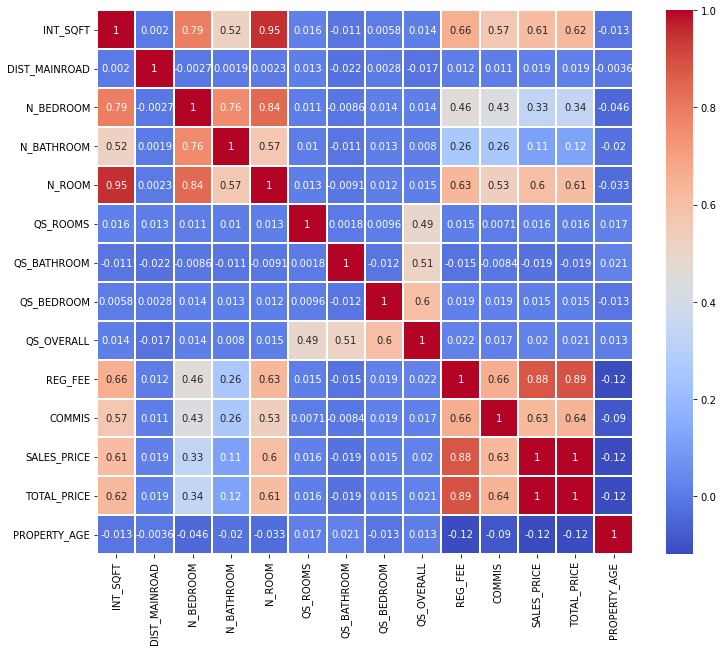

In [54]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True,linewidth=0.4,cmap='coolwarm');

Sales Price is the traret features.
There are some Correlation between features and target variables

# Distributions of all the features

In [ ]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(data.AREA, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(data.INT_SQFT, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(data.DATE_SALE, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(data.DIST_MAINROAD, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(data.N_BEDROOM, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(data.N_BATHROOM, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.N_ROOM, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.SALE_COND, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(data.PARK_FACIL, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.histplot(data.UTILITY_AVAIL, linewidth=0,kde=True)

plt.subplot(5,4,9)
sns.histplot(data.STREET, linewidth=0,kde=True)

plt.subplot(5,4,10)
sns.histplot(data.MZZONE, linewidth=0,kde=True)

plt.subplot(5,4,11)
sns.histplot(data.QS_ROOMS, linewidth=0,kde=True)

plt.subplot(5,4,12)
sns.histplot(data.QS_BATHROOM, linewidth=0,kde=True)

plt.subplot(5,4,13)
sns.histplot(data.QS_BEDROOM, linewidth=0,kde=True)

plt.subplot(5,4,14)
sns.histplot(data.SALES_PRICE, linewidth=0,kde=True)

plt.subplot(5,4,15)
sns.histplot(data.TOTAL_PRICE, linewidth=0,kde=True)

plt.subplot(5,4,16)
sns.histplot(data.PROPERTY_AGE, linewidth=0,kde=True)

plt.suptitle("column wise Distribution of Data", fontsize=20)
plt.show()

# Plotting Feature Columns vs Target Columns

We are going to plot two types of Columns.
1) Numerical Columns

2) Categorical Columns

# Numerical data vs Target

In [ ]:
data.head(2)

In [ ]:
plt.figure(figsize=(15,7),dpi=150)
plt.subplot(2,2,1)
sns.regplot(data.INT_SQFT,data.TOTAL_PRICE, scatter_kws={"color":"black"},line_kws={"color":"red"})
plt.subplot(2,2,2)
sns.regplot(data.DIST_MAINROAD,data.TOTAL_PRICE,scatter_kws={"color":"Blue"},line_kws={"color":"red"})

plt.suptitle("Continous numerical variable VS TOTAL_PRICE", fontsize=18)
plt.show()


In int sqft column we find good relation between the data.

In [ ]:
plt.figure(figsize=(10,5), dpi=150)
plt.subplot2grid((2,6),(0,0))
sns.regplot(data.N_BEDROOM, data.TOTAL_PRICE,scatter_kws={"color":"blue"},line_kws={"color":"red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(data.N_BATHROOM, data.TOTAL_PRICE,scatter_kws={"color":"brown"},line_kws={"color":"red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(data.N_ROOM, data.TOTAL_PRICE,scatter_kws={"color":"green"},line_kws={"color":"red"})

plt.subplot2grid((2,6),(0,3))
sns.regplot(data.QS_ROOMS, data.TOTAL_PRICE,scatter_kws={"color":"orange"},line_kws={"color":"red"})

plt.subplot2grid((2,6),(1,1))
sns.regplot(data.QS_BATHROOM, data.TOTAL_PRICE,scatter_kws={"color":"purple"},line_kws={"color":"red"})

plt.subplot2grid((2,6),(1,2))
sns.regplot(data.QS_BEDROOM, data.TOTAL_PRICE,scatter_kws={"color":"purple"},line_kws={"color":"red"})

plt.suptitle("Discrete variable vs TOTAL PRICE CHART",fontsize=18)
plt.show()


FRom this graph
In N_BEDROOM,N_BATHROOM and N_ROOM we find some good relations,so we will keep it.


IN QS_ROOM,QS_BATHROOM and QS_BEDROOM we didnt find any relations we going to drop it.

In [ ]:
data.head(2)

In [ ]:
data['BUILDTYPE']

# Categorical data Vs Target

In [ ]:
plt.figure(figsize=(20, 10))
plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=data.AREA,y=data.TOTAL_PRICE,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=data.SALE_COND,y=data.TOTAL_PRICE,order=data.groupby('SALE_COND')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['SALE_COND'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=data.MZZONE,y=data.TOTAL_PRICE,order=data.groupby('MZZONE')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['MZZONE'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=data.UTILITY_AVAIL,y=data.TOTAL_PRICE,order=data.groupby('UTILITY_AVAIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['UTILITY_AVAIL'])

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.barplot(x=data.STREET,y=data.TOTAL_PRICE,order=data.groupby('STREET')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['STREET'])

plt.subplot2grid((2,6),(1,4),colspan=2)
sns.barplot(x=data.PARK_FACIL,y=data.TOTAL_PRICE,order=data.groupby('PARK_FACIL')['TOTAL_PRICE'].mean().reset_index().sort_values('TOTAL_PRICE')['PARK_FACIL'])

plt.show()

Conclusions:
In all the above columns, we sort the columns in respect of total price and we are finding a good linear ordinal relations.
So we will perform encoding techniques. 


# ENCODING

In [ ]:
print(data['STREET'].unique())

# We are going to apply label encoder
#We are going to map the value to the columns

In [ ]:
#Encoding the area column orderly#
data.AREA=data.AREA.map({'Karapakkam':1,'Anna Nagar':2,'Adyar':3,'Velachery':4,'Chrompet':5,'KK Nagar':6,'T Nagar':7})
#Encoding SALE_COND column
data.SALE_COND=data.SALE_COND.map({'AbNormal':1,'Family':2,'Partial':3,'AdjLand':4,'Normal Sale':5})
#Encoding MZZONE column
data.MZZONE=data.MZZONE.map({'A':1,'RH':2,'RL':3,'I':4,'C':5,'RM':6})
#Encoding UTILITY_AVAIL column
data.UTILITY_AVAIL=data.UTILITY_AVAIL.map({'AllPub':1,'ELO':2,'NoSeWa':3})
#Encoding STREET column
data.STREET=data.STREET.map({'Paved':1,'Gravel':2,'No Access':3})
#Encoding PARK_FACIL column
data.PARK_FACIL=data.PARK_FACIL.map({'Yes':1,'No':2})



In [ ]:
#Encoding BUILDTYPE column
data.BUILDTYPE=data.BUILDTYPE.map({'Commercial':1,'Others':2,'House':3})

In [ ]:
print(data['BUILDTYPE'].unique())

In [ ]:
data.AREA=data.AREA.map({'Karapakkam':1,'Anna Nagar':2,'Adyar':3,'Velachery':4,'Chrompet':5,'KK Nagar':6,'T Nagar':7})


In [ ]:
print(data['SALE_COND'].unique())
print(data['MZZONE'].unique())
print(data['UTILITY_AVAIL'].unique())
print(data['STREET'].unique())
print(data['PARK_FACIL'].unique())


In [ ]:
data=data.reindex(columns=['AREA','INT_SQFT','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','N_BEDROOM','N_BATHROOM','PARK_FACIL','N_ROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','PARK_FACIL'
                           
                           ,'MZZONE','QS_OVERALL','REG_FEE','SALES_PRICE','PROPERTY_AGE','TOTAL_PRICE'])

In [ ]:
data.head()

In [ ]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(data.corr(method='pearson'), annot=True, linewidth=0.2, cmap='coolwarm');

In [ ]:
data.head()

# Removing unwanted columns

In [ ]:
df=data.copy()
df.drop(['REG_FEE','QS_OVERALL','QS_ROOMS','QS_BATHROOM','QS_BEDROOM'],axis=1,inplace=True)

In [ ]:
df

# Splitting data to features and target

In [ ]:
train=['AREA','INT_SQFT','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','N_BEDROOM','N_BATHROOM','PARK_FACIL','N_ROOM','PARK_FACIL','MZZONE','PROPERTY_AGE']
Target1=['SALES_PRICE']
Target2=['TOTAL_PRICE']
input = df[train].copy()
target1 = df[Target1].copy()
target2 = df[Target2].copy()

In [ ]:
target2.head()

# Splitting data for training and Testing 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(input, target1, test_size=0.2, random_state = 7)

In [ ]:
X_train

In [ ]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5),rot=90)
plt.show()

In [ ]:
mm=MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

In [ ]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

# Model Training LINEAR REGRESSION

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test
                    
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
lr.fit(X_train_mm,y_train)
y_predlrmm=lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# DECISION TREE

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))
dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

Here we concluded that we applllied Two algorithm linear regression and Decision Tree 
and we find good R2 score in Decision Tree.